# Proyek Analisis Data: Bike Sharing
- **Nama:** Rizky Surya Alfarizy
- **Email:** Rizkysuryaalfarizy30@gmail.com
- **ID Dicoding:** thisiskisur

## Menentukan Pertanyaan Bisnis

1. Bagaimana kinerja penyewaan sepeda dalam dua tahun terakhir?
2. Di musim apa penyewaan sepeda paling tinggi dan paling rendah?
3. Bagaimana pengaruh cuaca terhadap jumlah sepeda yang disewa?
4. Pada jam berapa penyewaan sepeda paling tinggi pada hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### tabel days_df

In [3]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### tabel hour_df

In [5]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Menilai data day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### 2. Check Missing Value

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### 3. Check duplicat

In [8]:
day_df.duplicated().sum()

np.int64(0)

#### 4. Check Parameter Statistik

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Kesimpulan
1. Terdapat kesalahan tipe data dteday
2. Dataset tidak dapat belum dapat menjelaskan pesebaran yr, mnnth, season, dan juga weathersit

### Menilai hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### 1. Check Missing Value

In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### 2. Check Duplicate Data

In [13]:
hour_df.duplicated().sum()

np.int64(0)

#### 3. Check Parameter Statistik

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Kesimpulan
1. Terdapat kesalahan tipe data dteday
2. Dataset tidak dapat belum dapat menjelaskan pesebaran yr, mnnth, season, dan juga weathersit

### Cleaning Data

### 1. Clean Data day_df

In [15]:
#merubah tipe data kolom ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

#merubah tipe data kolom ke category
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [16]:
#mapping_kolom_season
mapping_season = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'autumn'}
day_df['season'] = day_df['season'].map(mapping_season)

#mapping_kolom_bulan
mapping_bulan = {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}
day_df['mnth'] = day_df['mnth'].map(mapping_bulan)

#mapping_tahun
mapping_tahun   = {0:2011, 1:2012}
day_df['yr'] = day_df['yr'].map(mapping_tahun)

#mapping_weather
mapping_weather = {1:'clear', 2:'mist', 3:'light_rain', 4:'heavy_rain'}
day_df['weathersit'] = day_df['weathersit'].map(mapping_weather)

#mapping_workingday
mapping_workingday = {0:'weekend', 1:'weekday'}
day_df['workingday'] = day_df['workingday'].map(mapping_workingday)

#mapping_weekday
mapping_weekday = {0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday'}
day_df['weekday'] = day_df['weekday'].map(mapping_weekday)

In [17]:
day_df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,jan,0,saturday,weekend,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,winter,2011,jan,0,sunday,weekend,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,winter,2011,jan,0,monday,weekday,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,winter,2011,jan,0,tuesday,weekday,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,winter,2011,jan,0,wednesday,weekday,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,winter,2011,jan,0,thursday,weekday,clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,winter,2011,jan,0,friday,weekday,mist,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,winter,2011,jan,0,saturday,weekend,mist,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,winter,2011,jan,0,sunday,weekend,clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,winter,2011,jan,0,monday,weekday,clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### 2. Membersihkan kolom hour_df

In [18]:
#merubah tipe data kolom ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#merubah tipe data kolom ke category
hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [20]:
hour_df['season'] = hour_df['season'].map(mapping_season)
hour_df['mnth'] = hour_df['mnth'].map(mapping_bulan)
hour_df['yr'] = hour_df['yr'].map(mapping_tahun)
hour_df['weathersit'] = hour_df['weathersit'].map(mapping_weather)
hour_df['workingday'] = hour_df['workingday'].map(mapping_workingday)
hour_df['weekday'] = hour_df['weekday'].map(mapping_weekday)

In [19]:
hour_df.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## Exploratory Data Analysis (EDA)

### Explore day_df

In [21]:
day_df.groupby(by=['yr', 'mnth']).agg({
    'cnt': ['sum', 'max', 'min', 'mean']
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12804\2090637777.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['yr', 'mnth']).agg({


cnt                         
              sum   max   min         mean
yr   mnth                                 
2011 jan    38189  1985   431  1231.903226
     feb    48215  2927  1005  1721.964286
     mar    64045  3239   605  2065.967742
     apr    94870  5312   795  3162.333333
     may   135821  5805  2633  4381.322581
     jun   143512  5515  3767  4783.733333
     jul   141341  6043  3285  4559.387097
     aug   136691  5895  1115  4409.387097
     sep   127418  5423  1842  4247.266667
     oct   123511  5511   627  3984.225806
     nov   102167  4486  1495  3405.566667
     dec    87323  3940   705  2816.870968
2012 jan    96744  4521  1301  3120.774194
     feb   103137  5062  1529  3556.448276
     mar   164875  8362  3194  5318.548387
     apr   174224  7460  1027  5807.466667
     may   195865  8294  2843  6318.225806
     jun   202830  8120  4127  6761.000000
     jul   203607  8173  4459  6567.967742
     aug   214503  7865  4549  6919.451613
     sep   218573  8714  4073  7285.766667
     oct   198841  8156    22  6414.225806
     nov   152664  6852  2277  5088.800000
     dec   123713  6606   441  3990.741935

In [22]:
day_df_total_bulanan = day_df.groupby(by='mnth').agg({
    'cnt': ['sum', 'max', 'min', 'mean']
})
day_df_total_bulanan.columns = day_df_total_bulanan.columns.droplevel(0)
day_df_total_bulanan.sort_values(by='sum', ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12804\89405785.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df_total_bulanan = day_df.groupby(by='mnth').agg({


,sum,max,min,mean
mnth,,,,
aug,351194,7865,1115,5664.419355
jun,346342,8120,3767,5772.366667
sep,345991,8714,1842,5766.516667
jul,344948,8173,3285,5563.677419
may,331686,8294,2633,5349.774194
oct,322352,8156,22,5199.225806
apr,269094,7460,795,4484.900000
nov,254831,6852,1495,4247.183333
mar,228920,8362,605,3692.258065


In [22]:
day_df_total_bulanan = day_df.groupby(by='mnth').agg({
    'cnt': ['sum', 'max', 'min', 'mean']
})
day_df_total_bulanan.columns = day_df_total_bulanan.columns.droplevel(0)
day_df_total_bulanan.sort_values(by='sum', ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12804\89405785.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df_total_bulanan = day_df.groupby(by='mnth').agg({


,sum,max,min,mean
mnth,,,,
aug,351194,7865,1115,5664.419355
jun,346342,8120,3767,5772.366667
sep,345991,8714,1842,5766.516667
jul,344948,8173,3285,5563.677419
may,331686,8294,2633,5349.774194
oct,322352,8156,22,5199.225806
apr,269094,7460,795,4484.900000
nov,254831,6852,1495,4247.183333
mar,228920,8362,605,3692.258065


#### Penyewa tertinggi terdapat di bulan Agustus, dan terendah di bulan Januari

In [23]:
day_df.groupby(by='season').agg({
    'cnt': ['sum', 'max', 'min', 'mean'],
    'temp' : ['mean', 'max', 'min', 'std'],
    'atemp': ['mean', 'max', 'min', 'std'],
    'hum' : ['mean', 'max', 'min', 'std'],
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12804\4076314402.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


cnt                               temp                      \
            sum   max   min         mean      mean       max       min   
season                                                                   
winter   471348  7836   431  2604.132597  0.297748  0.572500  0.059130   
spring   918589  8362   795  4992.331522  0.544405  0.808333  0.253043   
summer  1061129  8714  1115  5644.303191  0.706309  0.861667  0.469167   
autumn   841613  8555    22  4728.162921  0.422906  0.657500  0.220833   

                     atemp                                     hum            \
             std      mean       max       min       std      mean       max   
season                                                                         
winter  0.102735  0.296914  0.548617  0.079070  0.099026  0.582903  0.948261   
spring  0.122650  0.520307  0.757579  0.250339  0.108022  0.626948  0.922500   
summer  0.070848  0.655898  0.840896  0.242400  0.072056  0.633482  0.939565   
autumn  0.107834  0.415539  0.607975  0.227913  0.095536  0.668719  0.972500   

                            
             min       std  
season                      
winter  0.000000  0.151880  
spring  0.254167  0.152841  
summer  0.360000  0.119349  
autumn  0.333478  0.131248

In [24]:
day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12804\3968514376.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


,season,registered,casual
0,winter,410726,60622
1,spring,715067,203522
2,summer,835038,226091
3,autumn,711831,129782


1. Penyewaan Terbanyak dan Tersedikit:
   -Penyewaan terbanyak: Fall
   -Penyewaan tersedikit: Springer (mungkin maksudnya Spring)
   -Rata-rata penyewaan terbanyak: Terjadi pada musim Fall
2. Suhu Rata-Rata dari Tinggi ke Rendah:
   -Fall
   -Summer
   -Winter
   -Springer (Spring)
3. Rata-Rata Suhu yang Dirasakan dari Tinggi ke Rendah:
   -Fall
   -Summer
   -Winter
   -Springer (Spring)
4. Kelembaban Rata-Rata dari Tinggi ke Rendah:
   -Winter
   -Fall
   -Summer
   -Springer (Spring)
Eksplore pengaruh cuaca terhadap jumlah total rental

In [25]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['sum', 'max', 'min', 'mean']
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12804\350538447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weathersit').agg({


cnt                        
                sum   max  min         mean
weathersit                                 
clear       2257952  8714  431  4876.786177
mist         996858  8362  605  4035.862348
light_rain    37869  4639   22  1803.285714

### Explore hour_df

1. Eksplore jumlah total rental tiap jam pada hari kerja

In [27]:
filter_workingday = hour_df[(hour_df["workingday"] == 'weekday')]
hour_df_workingday = filter_workingday.groupby(by='hr').agg({
    'cnt': ['sum', 'max', 'min', 'mean']
})
hour_df_workingday.columns = hour_df_workingday.columns.droplevel(0)
hour_df_workingday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hr,,,,
17,262120,976,26,525.290581
18,245129,977,26,492.226908
8,236595,839,31,477.006048
19,173504,743,18,348.401606
16,146268,634,13,293.122244
7,144144,596,18,290.612903
20,124360,567,23,249.718876
9,119793,426,23,241.518145
15,100263,601,13,201.331325


2. Eksplore jumlah rental ketika hari libur

In [28]:
filter_workingday = hour_df[(hour_df["workingday"] == 'weekend')]
hour_df_workingday = filter_workingday.groupby(by='hr').agg({
    'cnt': ['sum', 'max', 'min', 'mean']
})
hour_df_workingday.columns = hour_df_workingday.columns.droplevel(0)
hour_df_workingday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hr,,,,
13,86101,760,30,372.731602
12,84606,776,32,366.259740
14,84233,750,23,364.645022
15,82886,750,7,358.813853
16,81480,783,11,352.727273
17,74740,731,15,323.549784
11,72838,663,27,315.316017
18,64643,676,23,281.056522
10,59115,539,12,255.909091


Waktu Penyewaan Tertinggi pada Hari Kerja dan Hari Libur:
1. Hari Kerja: Penyewaan sepeda terbanyak terjadi pada sore hari (16.00 - 20.00) dan pagi hari (07.00 - 09.00).
2. Hari Libur: Data spesifik untuk hari libur tidak diberikan dalam pernyataan ini, namun dapat diantisipasi bahwa pola penyewaan mungkin berbeda
   dengan hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kinerja penyewaan sepeda dalam dua tahun terakhir?

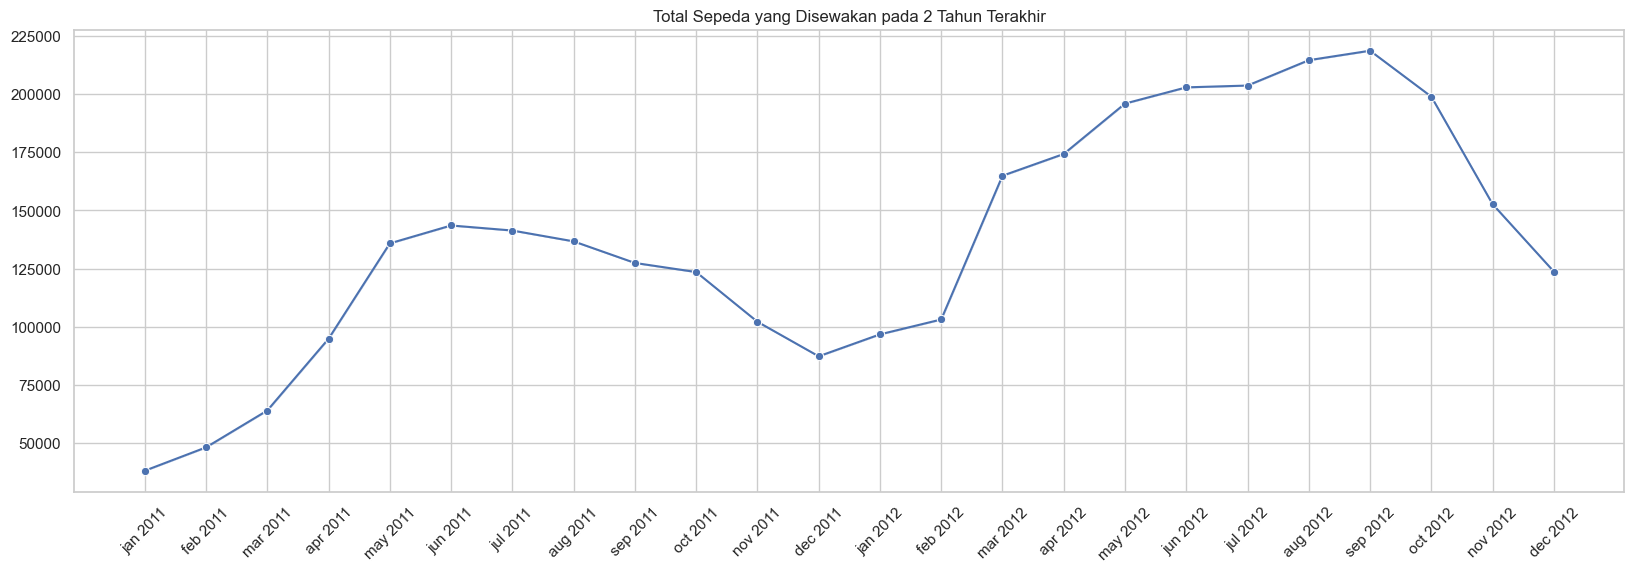

In [29]:
#menggganti datatype untuk merge kolom
plot_month = day_df['mnth'].astype(str)
plot_year = day_df['yr'].astype(str)

#merging kolom month dan year untuk plot
day_df['year_month'] = plot_month + ' ' + plot_year

# membuat kolom berisi sum data kolom 'total' untuk setiap 'year_month'
day_df['total_sum'] = day_df.groupby('year_month')['cnt'].transform('sum')

# membuat line chart
plt.figure(figsize=(20, 6))
sns.set(style='whitegrid')
sns.lineplot(
    data=day_df,
    x='year_month',
    y='total_sum',
    marker='o'
)
plt.title("Total Sepeda yang Disewakan pada 2 Tahun Terakhir")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.show()

In [30]:
day_df.groupby(by='year_month')['total_sum'].sum()

year_month
apr 2011    2846100
apr 2012    5226720
aug 2011    4237421
aug 2012    6649593
dec 2011    2707013
dec 2012    3835103
feb 2011    1350020
feb 2012    2990973
jan 2011    1183859
jan 2012    2999064
jul 2011    4381571
jul 2012    6311817
jun 2011    4305360
jun 2012    6084900
mar 2011    1985395
mar 2012    5111125
may 2011    4210451
may 2012    6071815
nov 2011    3065010
nov 2012    4579920
oct 2011    3828841
oct 2012    6164071
sep 2011    3822540
sep 2012    6557190
Name: total_sum, dtype: int64

Berdasarkan plot total penyewaan sepeda selama dua tahun terakhir, terlihat bahwa minat untuk menyewa sepeda meningkat secara signifikan pada tahun 2012 dibandingkan dengan tahun sebelumnya. Puncak penyewaan sepeda terjadi pada bulan September 2012, namun kemudian mengalami penurunan pada bulan berikutnya. Pada tahun 2012, penyewaan terendah tercatat pada bulan Januari. Sementara itu, pada tahun 2011, puncak penyewaan terjadi pada bulan Juli, dan penyewaan terendah juga terjadi pada bulan Januari 2011.

### Pertanyaan 2: Di musim apa penyewaan sepeda paling tinggi dan paling rendah?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12804\2085372983.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_season = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


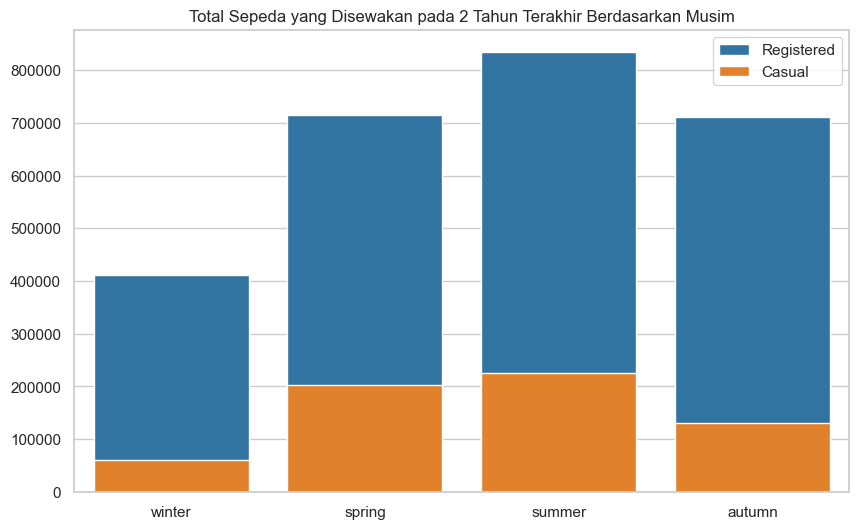

In [31]:
#membuat variabel total data pelanggan registered dan kasual setiap season
plot_season = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

# membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_season,
    x='season',
    y='registered',
    label='Registered',
    color='tab:blue'
)
sns.barplot(
    data=plot_season,
    x='season',
    y='casual',
    label='Casual',
    color='tab:orange'
)
plt.title('Total Sepeda yang Disewakan pada 2 Tahun Terakhir Berdasarkan Musim')
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

Pada gambar plot dapat dilihat bahwa total penyewaan sepeda paling banyak terjadi pada musim fall baik untuk pelanggan casual maupun pelanggan yang sudah registered. Sebaliknya total penyewaaan sepeda paling sedikit terjadi pada musing springer.

### Pertanyaan 3: Apakah cuaca mempengaruhi jumlah sepeda yang disewa?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12804\4050746090.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_weather = day_df.groupby(by='weathersit').agg({


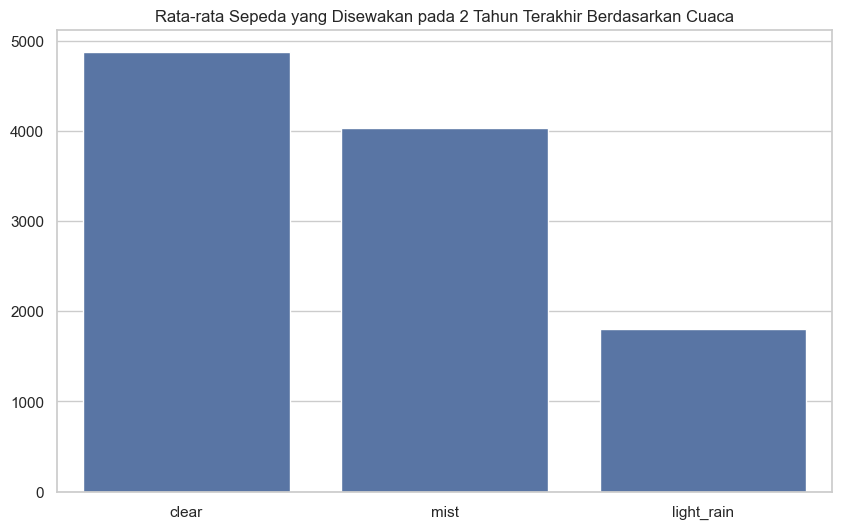

In [32]:
#membuat variabel total data pelanggan berdasarkan cuaca
plot_weather = day_df.groupby(by='weathersit').agg({
    'cnt': 'mean'
}).reset_index()

# membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_weather,
    x='weathersit',
    y='cnt'
)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Rata-rata Sepeda yang Disewakan pada 2 Tahun Terakhir Berdasarkan Cuaca')
plt.show()

Berdasarkan plot yang menunjukkan hubungan antara cuaca dan rata-rata penyewaan sepeda, cuaca cerah (clear) memiliki rata-rata penyewaan tertinggi. Perbedaan rata-rata penyewaan pada setiap kategori cuaca terlihat cukup signifikan, menunjukkan bahwa cuaca memiliki pengaruh yang cukup penting terhadap minat pelanggan dalam menyewa sepeda.

### Pertanyaan 4: Pada jam berapa penyewaan sepeda paling tinggi pada hari kerja dan hari libur?

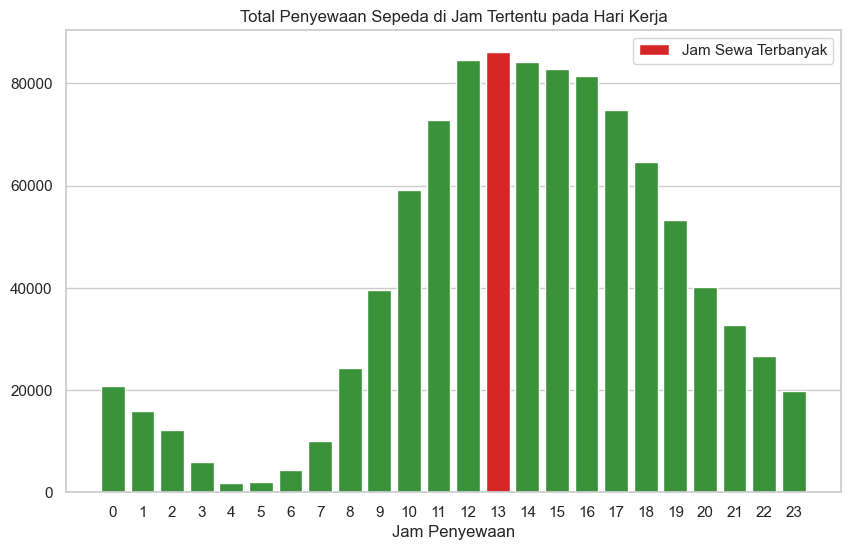

In [33]:
#membuat variabel total data pelanggan berdasarkan jam pada hari kerja
plot_hour_workingday = filter_workingday.groupby(by='hr').agg({
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

# Menentukan indeks kolom dengan total terbesar
max_col = plot_hour_workingday['cnt'].idxmax()

# Membuat bar plot
sns.barplot(
    data=plot_hour_workingday,
    x='hr',
    y='cnt',
    color='tab:green'
)
plt.bar(max_col, plot_hour_workingday.loc[max_col, 'cnt'], color='tab:red', label='Jam Sewa Terbanyak')

plt.title("Total Penyewaan Sepeda di Jam Tertentu pada Hari Kerja")
plt.xlabel('Jam Penyewaan')
plt.ylabel(None)
plt.legend()
plt.show()

## Conclusion
1. Selama dua tahun terakhir, performa penyewaan sepeda secara keseluruhan menunjukkan tren yang positif.
2. Penyewaan sepeda tertinggi terjadi pada musim gugur (fall) dan terendah pada musim panas (summer).
3. Cuaca memiliki pengaruh signifikan terhadap jumlah sepeda yang disewakan, dengan pelanggan lebih cenderung menyewa sepeda saat cuaca cerah atau sedikit berawan.
4. Pada hari kerja, penyewaan sepeda paling banyak terjadi pada sore hari antara pukul 16.00 - 20.00 dan pagi hari antara pukul 07.00 - 09.00 dengan puncak penyewaan pada pukul 17.00. Pada hari libur, pelanggan lebih memilih menyewa sepeda pada siang hari antara pukul 12.00 - 16.00, dengan puncak penyewaan pada pukul 13.00.

In [36]:
hour_df.to_csv('./dashboard/main_data.csv', index=False)